# Glass Identification prediction

Project Description:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps


In [148]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [149]:
glass_iden_pred=pd.read_csv("Glass_Identification.csv")
glass_iden_pred

,Id Number,RI,Na,Mg,Al,Si,k,Ca,Ba,Fe,Glass Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


There are 214 rows and 11 columns

In [150]:
glass_iden_pred.head()

,Id Number,RI,Na,Mg,Al,Si,k,Ca,Ba,Fe,Glass Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [151]:
glass_iden_pred.tail()

,Id Number,RI,Na,Mg,Al,Si,k,Ca,Ba,Fe,Glass Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [152]:
glass_iden_pred.columns

Index(['Id Number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'k', 'Ca', 'Ba', 'Fe',
       'Glass Type'],
      dtype='object')

In [153]:
glass_iden_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id Number   214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   k           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass Type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


All are numerical datatypes and there is no categorical data type


In [154]:
glass_iden_pred.isnull().sum()


Id Number     0
RI            0
Na            0
Mg            0
Al            0
Si            0
k             0
Ca            0
Ba            0
Fe            0
Glass Type    0
dtype: int64

There are no null values in the columns

<Axes: >

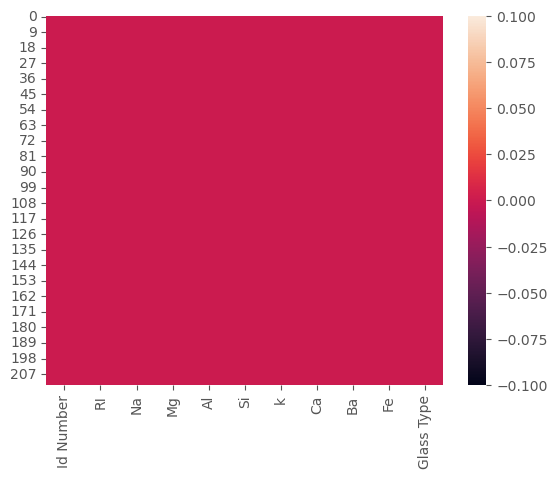

In [155]:
sns.heatmap(glass_iden_pred.isnull())

Dropping ID number as it does not impact the target variable

In [156]:
glass_iden_pred.drop('Id Number',axis=1,inplace=True)

In [157]:
glass_iden_pred.describe()

,RI,Na,Mg,Al,Si,k,Ca,Ba,Fe,Glass Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000



Observations:
    1.Skewness present in the columns K,Ba,Fe 
    2.Outliers are present in the pottasium ,Calcium and barium columns as there is a difference between 75% and max value.

In [158]:
glass_iden_pred.head()

,RI,Na,Mg,Al,Si,k,Ca,Ba,Fe,Glass Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [159]:
for i in glass_iden_pred.columns:
    print(glass_iden_pred[i].value_counts())
    print('\n')

RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


k
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: count, Length: 65, dtype: int64


Ca

As mentioned in the specification, The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). Hence we are replacing the value of Glass type.For values 1,2,3,4 it is changed to 1( Window glass)and 5,6,7 as 0 (Non Window glass).

In [160]:

glass_iden_pred['Glass Type'].replace([1,2,3,4,5,6,7],[1,1,1,1,0,0,0],inplace=True)
glass_iden_pred

,RI,Na,Mg,Al,Si,k,Ca,Ba,Fe,Glass Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,0


## EDA Analysis:

<function matplotlib.pyplot.show(close=None, block=None)>

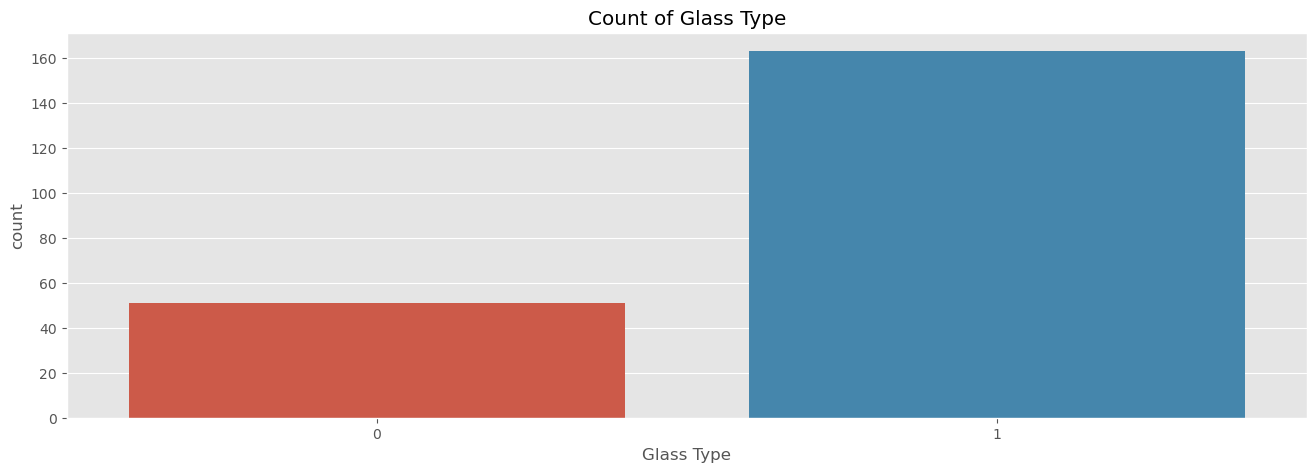

In [161]:
plt.figure(figsize=(16,5))
sns.countplot(x='Glass Type',data=glass_iden_pred)
plt.title('Count of Glass Type')
plt.show

In [162]:
glass_iden_pred['Glass Type'].value_counts()

Glass Type
1    163
0     51
Name: count, dtype: int64

Glass Type 2 has highest count when compared to 1

<function matplotlib.pyplot.show(close=None, block=None)>

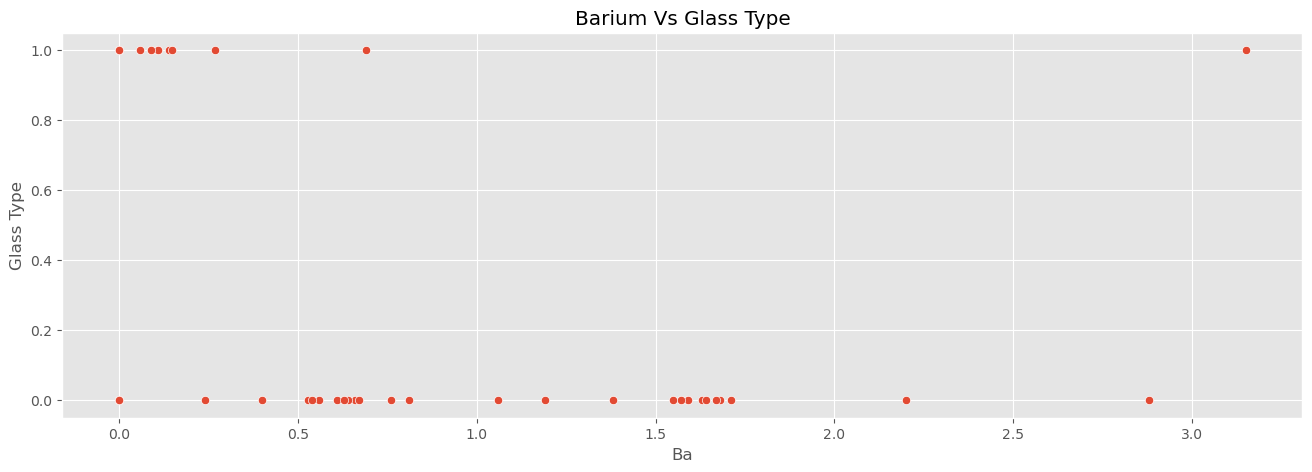

In [163]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Ba',y='Glass Type',data=glass_iden_pred)
plt.title('Barium Vs Glass Type')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

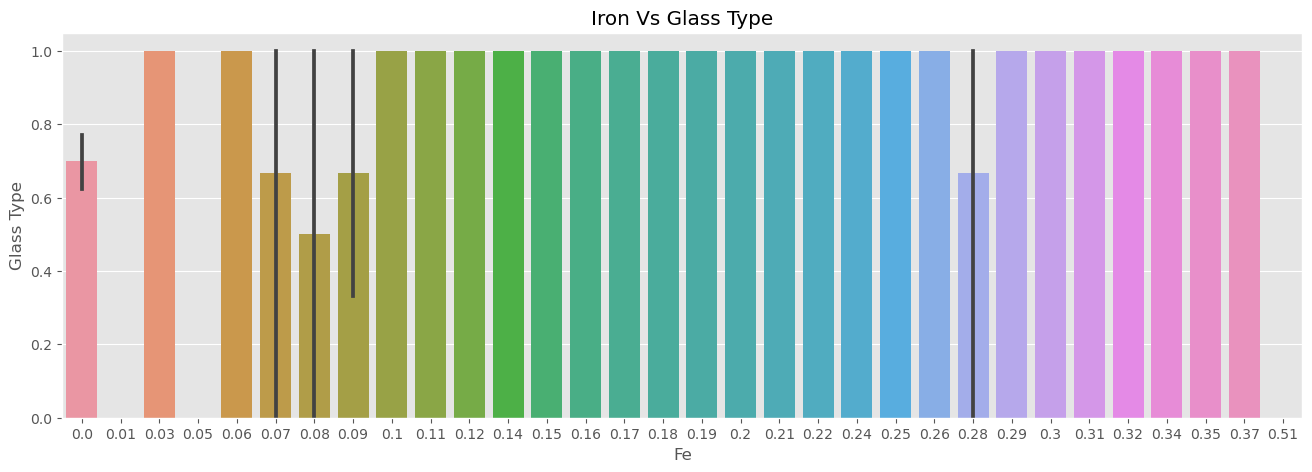

In [164]:
plt.figure(figsize=(16,5))
sns.barplot(x='Fe',y='Glass Type',data=glass_iden_pred)
plt.title('Iron Vs Glass Type')
plt.show

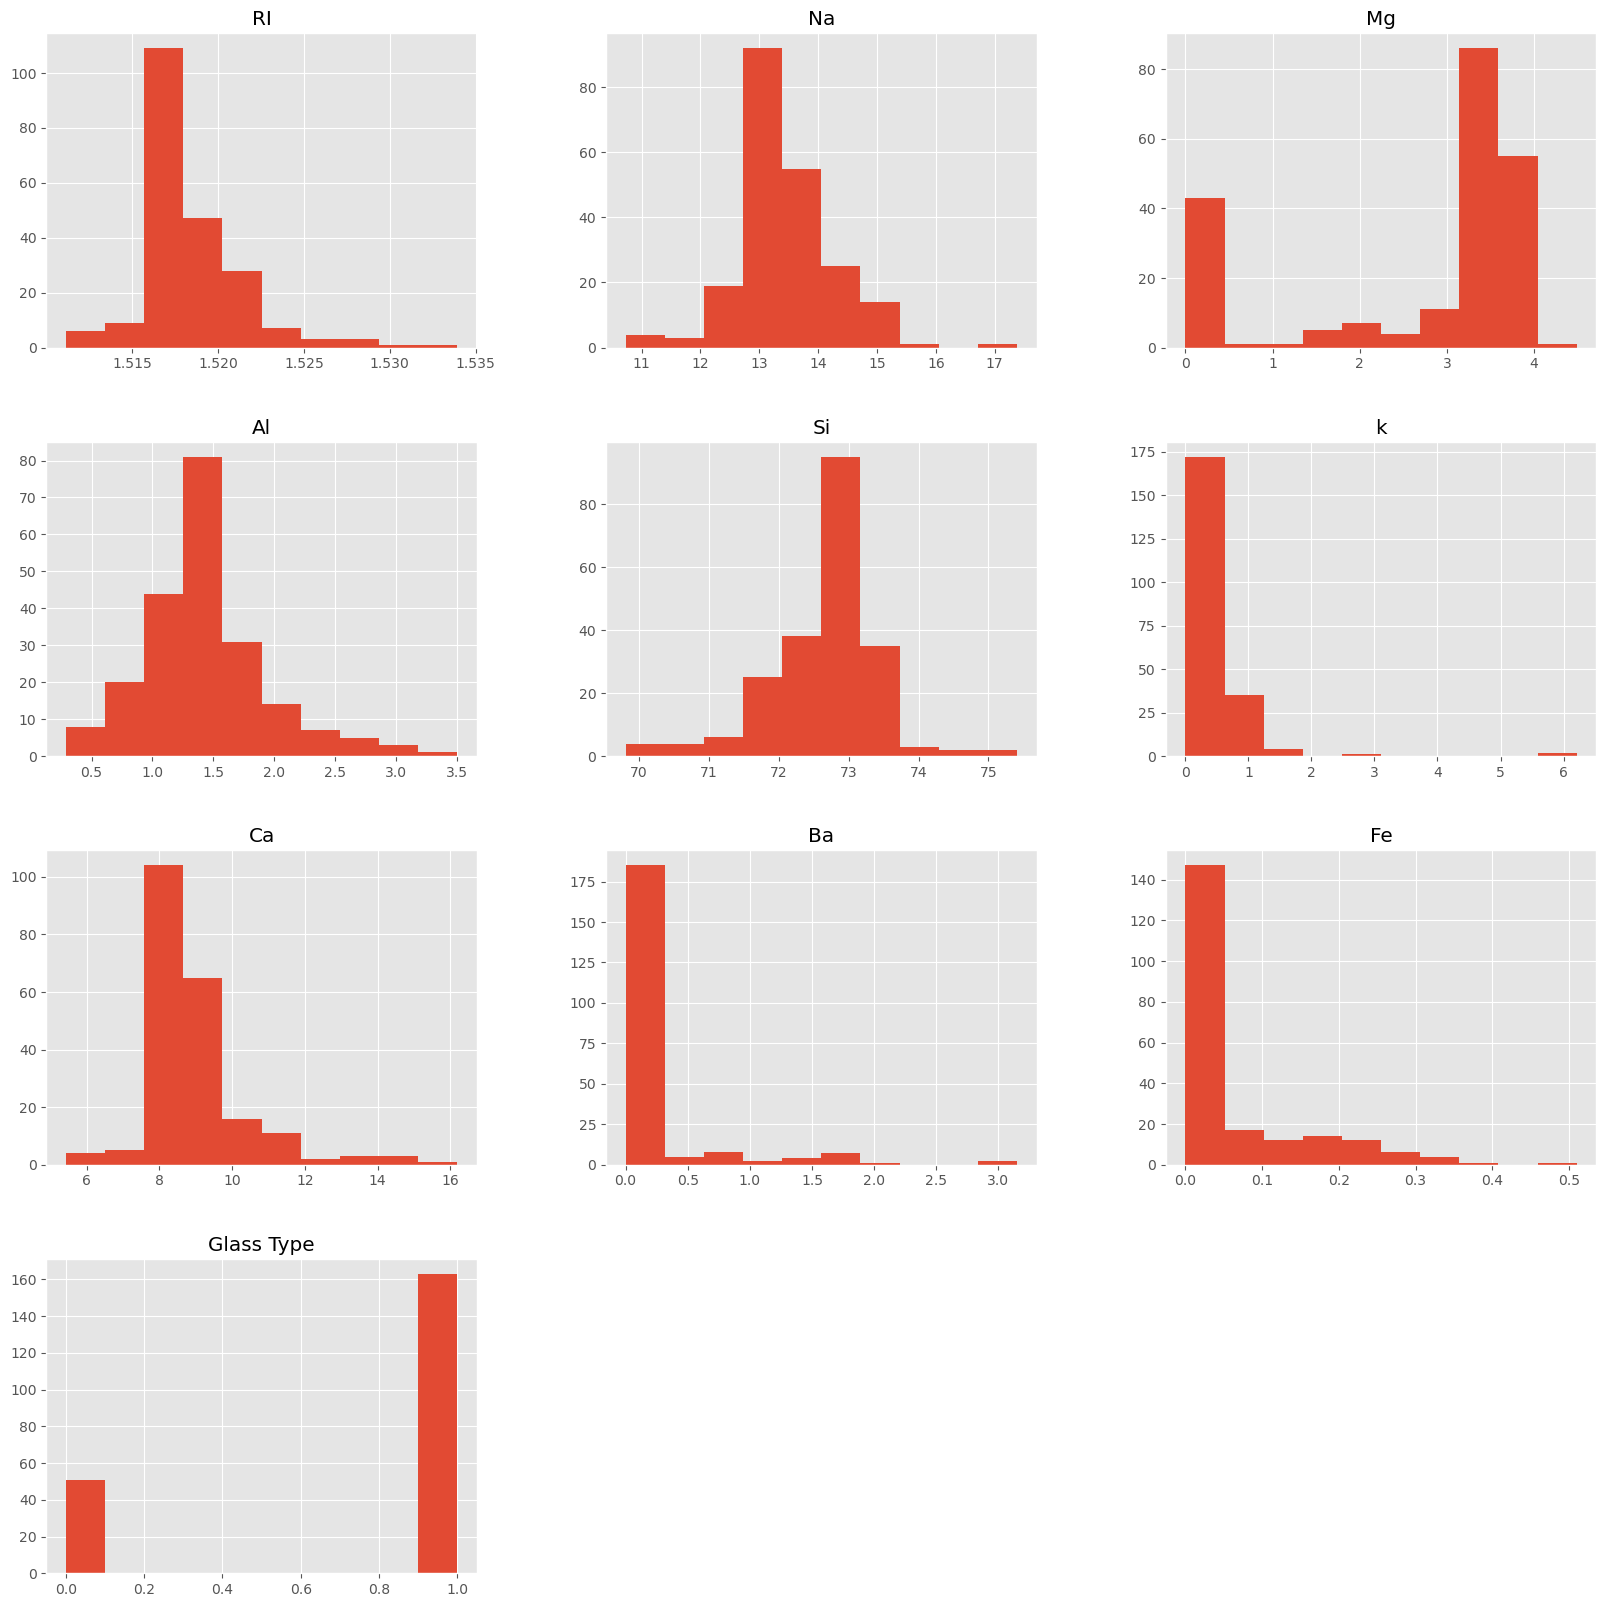

In [165]:
glass_iden_pred.hist(figsize=(20,20))
plt.show()

<Axes: >

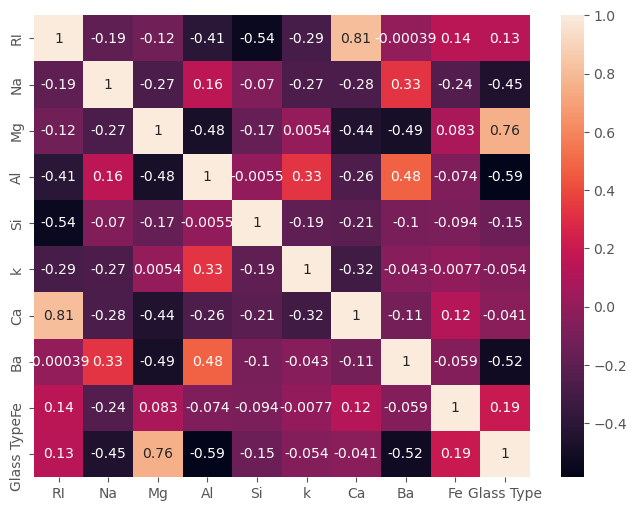

In [166]:
plt.figure(figsize=(8,6))
sns.heatmap(glass_iden_pred.corr(),annot=True)

There is a high correction between Refractive Index and Calcium  viceversa, RI Vs SI, RI Vs Al
There is a high correction between Magnesium  and Glass Type, Na Vs Glass Type,Aln Vs Glass Type,Ba Vs Glass Type and Viceversa for all .

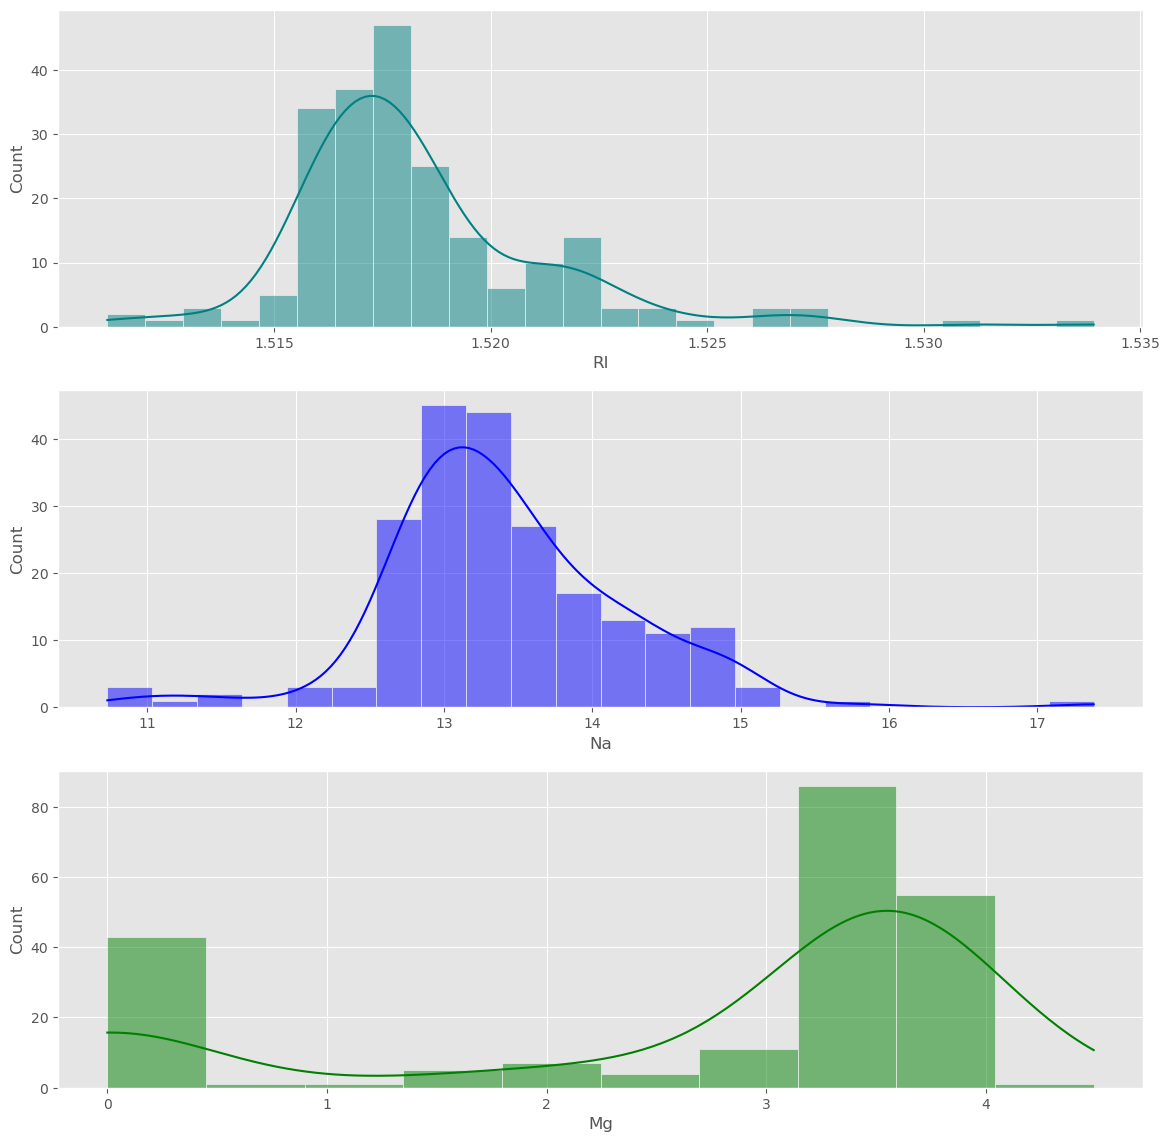

In [167]:
plt.style.use('ggplot')
fig,ax=plt.subplots(3,1,figsize=(14,14))

sns.histplot(x=glass_iden_pred['RI'],kde="True",ax=ax[0],color="teal")
ax[0].set_xlabel("RI");

sns.histplot(x=glass_iden_pred['Na'],kde="True",ax=ax[1],color="blue")
ax[1].set_xlabel("Na");

sns.histplot(x=glass_iden_pred['Mg'],kde="True",ax=ax[2],color="green")
ax[2].set_xlabel("Mg");



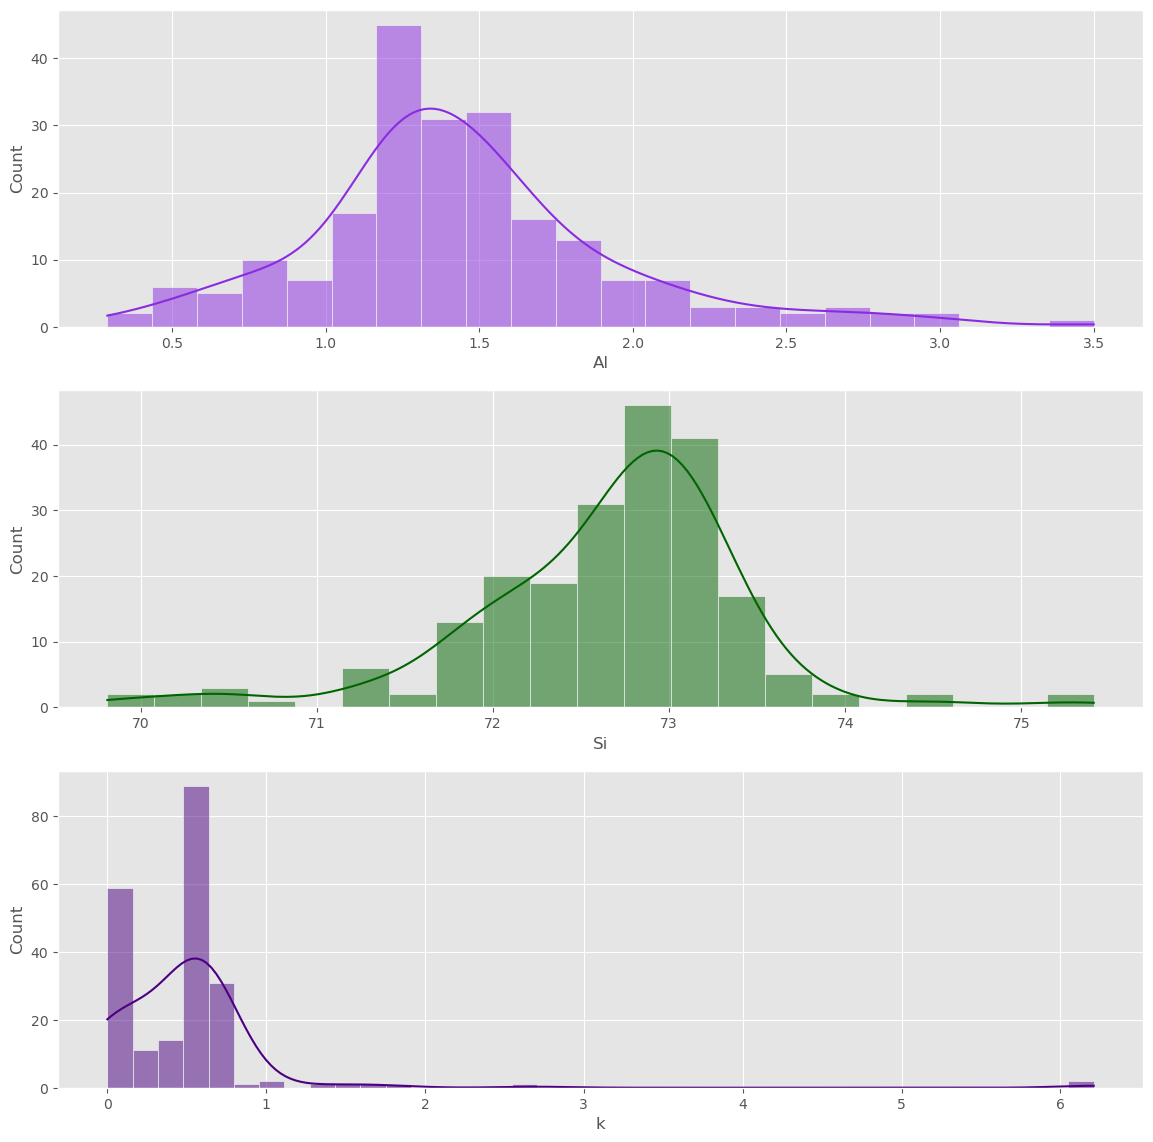

In [168]:

plt.style.use('ggplot')
fig,ax=plt.subplots(3,1,figsize=(14,14))

sns.histplot(x=glass_iden_pred['Al'],kde="True",ax=ax[0],color="blueviolet")
ax[0].set_xlabel("Al");

sns.histplot(x=glass_iden_pred['Si'],kde="True",ax=ax[1],color="darkgreen")
ax[1].set_xlabel("Si");

sns.histplot(x=glass_iden_pred['k'],kde="True",ax=ax[2],color="Indigo")
ax[2].set_xlabel("k");

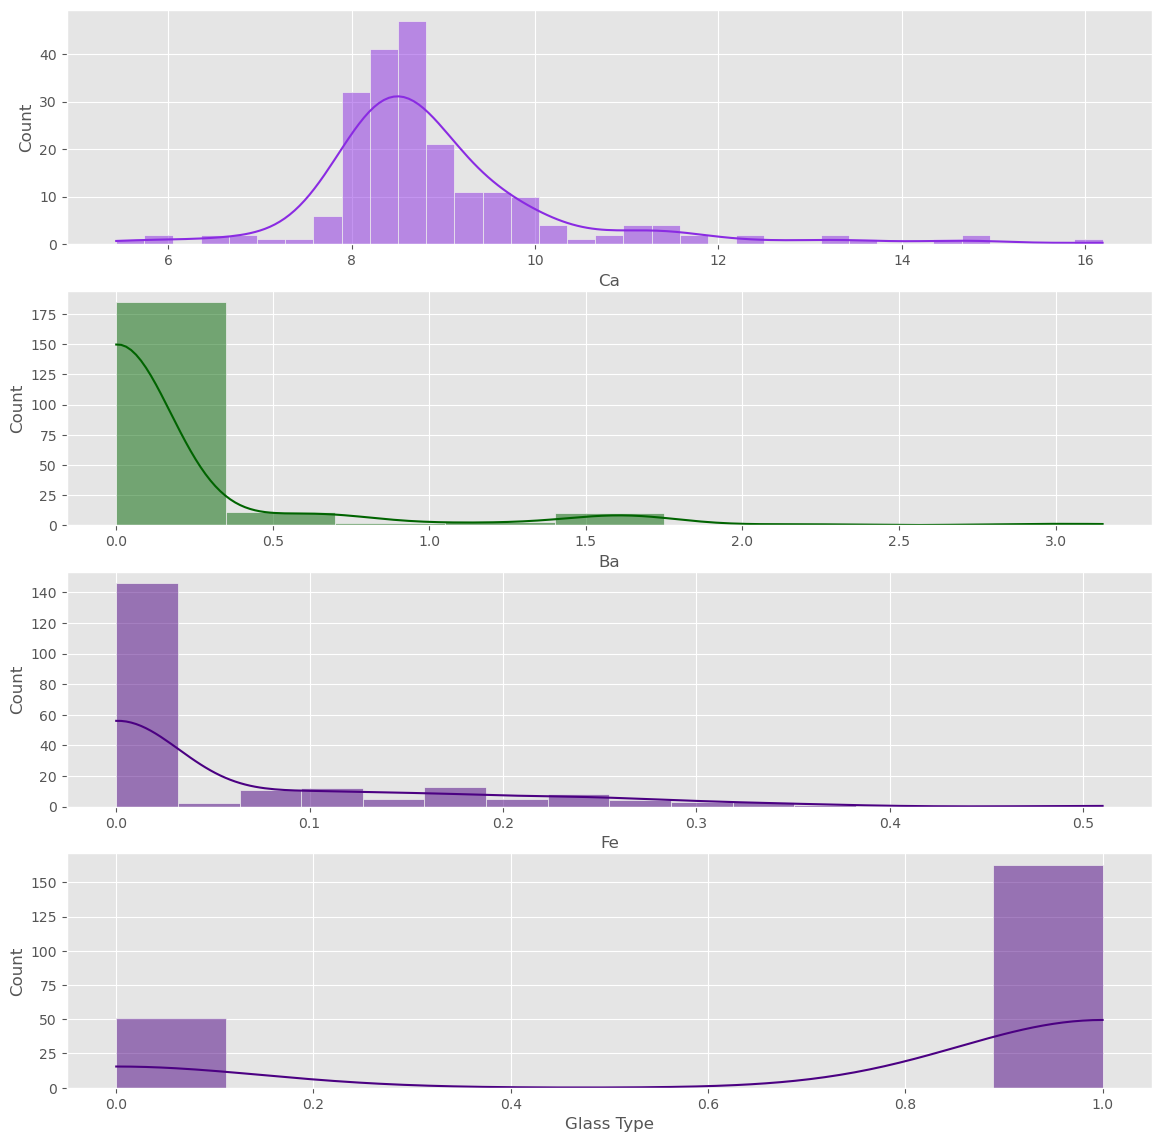

In [169]:
plt.style.use('ggplot')
fig,ax=plt.subplots(4,1,figsize=(14,14))

sns.histplot(x=glass_iden_pred['Ca'],kde="True",ax=ax[0],color="blueviolet")
ax[0].set_xlabel("Ca");

sns.histplot(x=glass_iden_pred['Ba'],kde="True",ax=ax[1],color="darkgreen")
ax[1].set_xlabel("Ba");

sns.histplot(x=glass_iden_pred['Fe'],kde="True",ax=ax[2],color="Indigo")
ax[2].set_xlabel("Fe");

sns.histplot(x=glass_iden_pred['Glass Type'],kde="True",ax=ax[3],color="Indigo")
ax[3].set_xlabel("Glass Type");

Outliers are present in the Fe(Iron),Mg(Magnesium) and Ba(Barium) count when compared to other compounds.

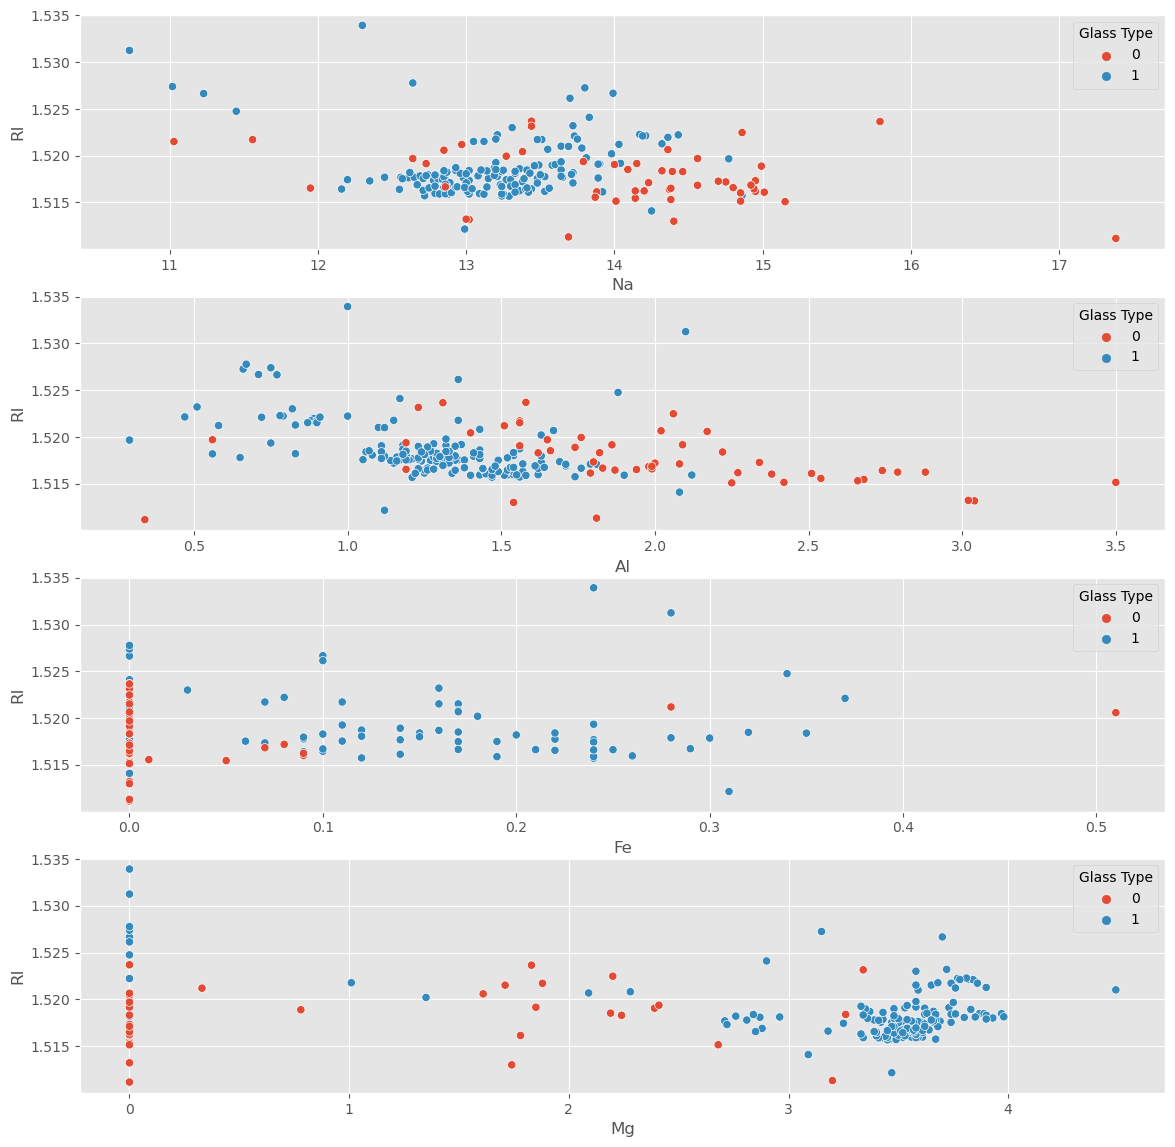

In [170]:
plt.style.use('ggplot')
fig,ax=plt.subplots(4,1,figsize=(14,14))

sns.scatterplot(x=glass_iden_pred['Na'],y=glass_iden_pred['RI'],hue=glass_iden_pred['Glass Type'],ax=ax[0])
ax[0].set_xlabel("Na");

sns.scatterplot(x=glass_iden_pred['Al'],y=glass_iden_pred['RI'],hue=glass_iden_pred['Glass Type'],ax=ax[1])
ax[1].set_xlabel("Al");

sns.scatterplot(x=glass_iden_pred['Fe'],y=glass_iden_pred['RI'],hue=glass_iden_pred['Glass Type'],ax=ax[2])
ax[2].set_xlabel("Fe");

sns.scatterplot(x=glass_iden_pred['Mg'],y=glass_iden_pred['RI'],hue=glass_iden_pred['Glass Type'],ax=ax[3])
ax[3].set_xlabel("Mg");




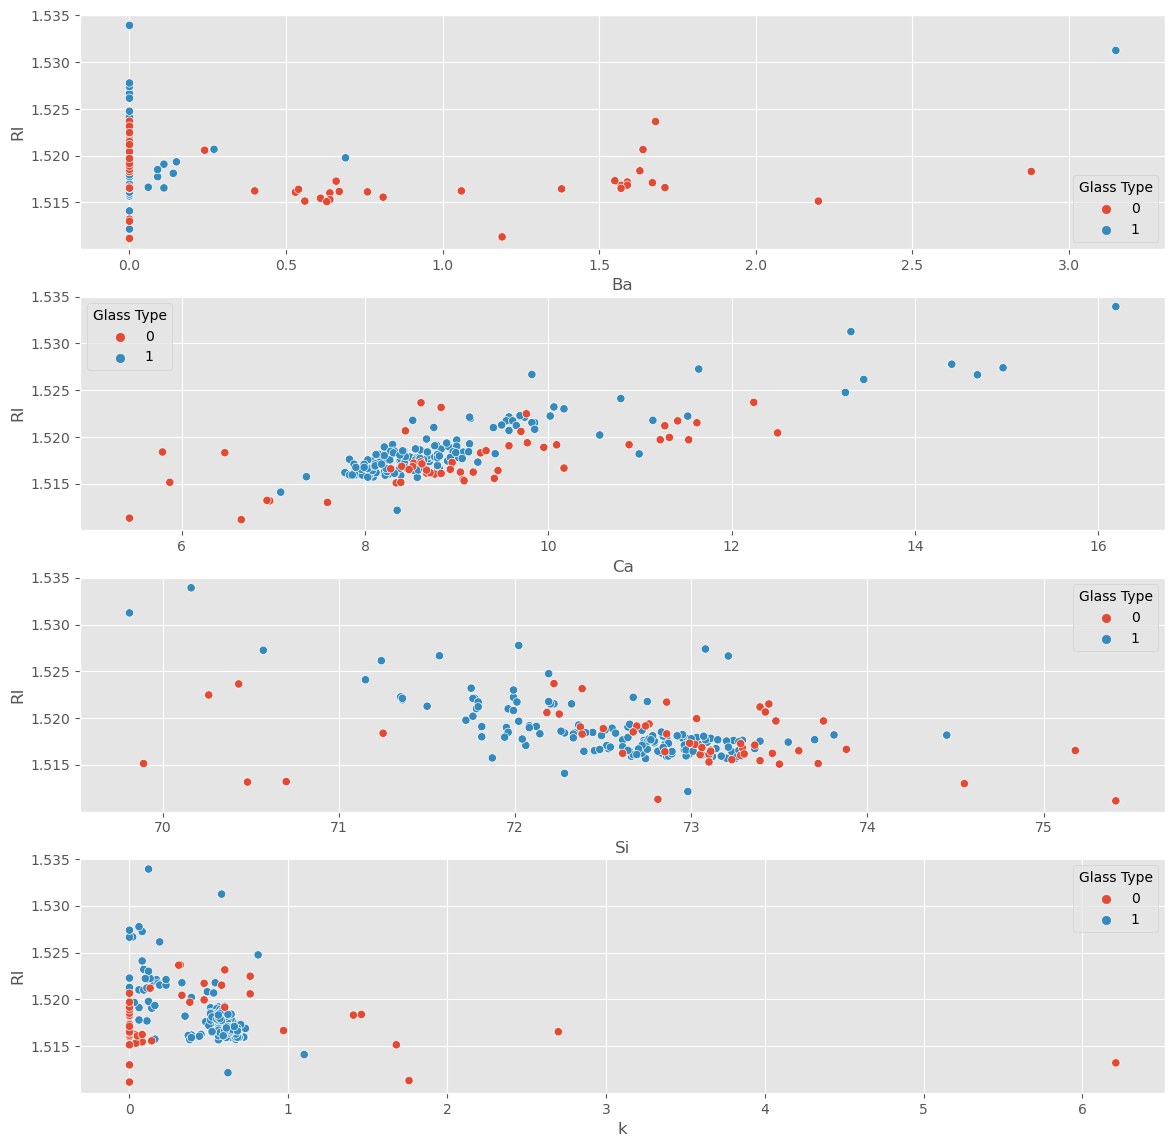

In [171]:
plt.style.use('ggplot')
fig,ax=plt.subplots(4,1,figsize=(14,14))

sns.scatterplot(x=glass_iden_pred['Ba'],y=glass_iden_pred['RI'],hue=glass_iden_pred['Glass Type'],ax=ax[0])
ax[0].set_xlabel("Ba");

sns.scatterplot(x=glass_iden_pred['Ca'],y=glass_iden_pred['RI'],hue=glass_iden_pred['Glass Type'],ax=ax[1])
ax[1].set_xlabel("Ca");

sns.scatterplot(x=glass_iden_pred['Si'],y=glass_iden_pred['RI'],hue=glass_iden_pred['Glass Type'],ax=ax[2])
ax[2].set_xlabel("Si");

sns.scatterplot(x=glass_iden_pred['k'],y=glass_iden_pred['RI'],hue=glass_iden_pred['Glass Type'],ax=ax[3])
ax[3].set_xlabel("k");


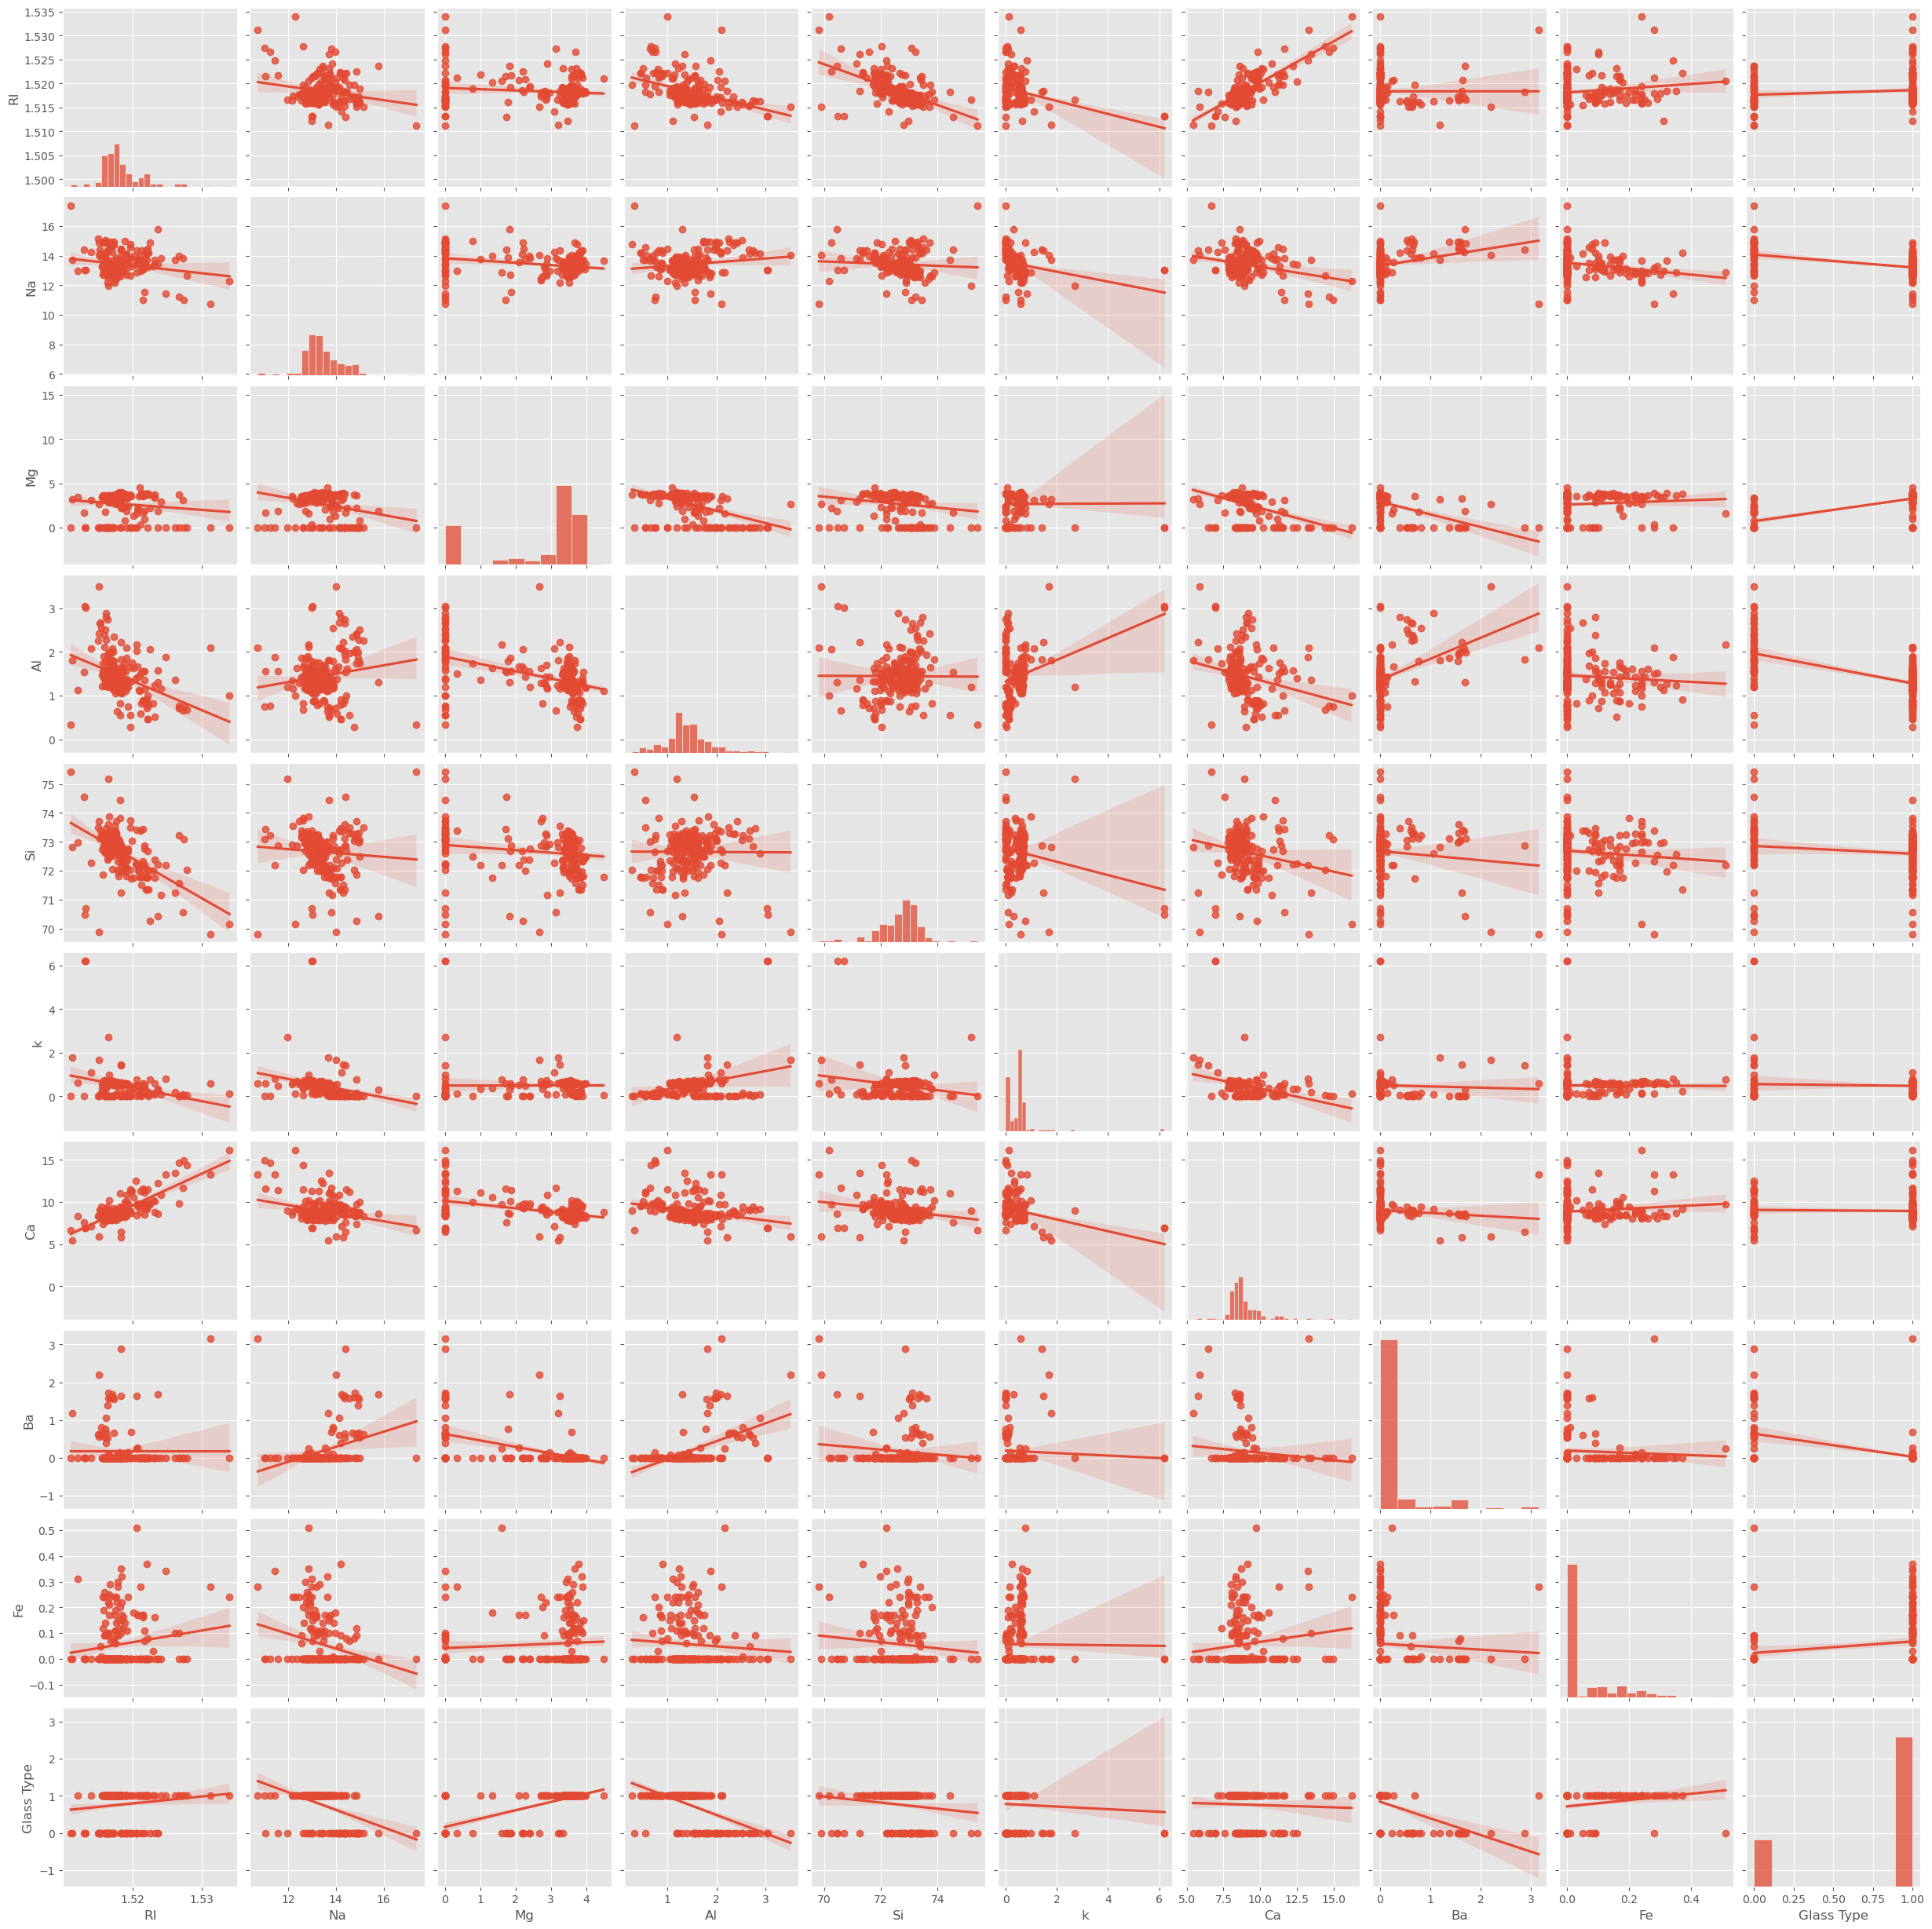

In [172]:
sns.pairplot(glass_iden_pred, kind='reg')

RI               Axes(0.125,0.786098;0.133621x0.0939024)
Na            Axes(0.285345,0.786098;0.133621x0.0939024)
Mg             Axes(0.44569,0.786098;0.133621x0.0939024)
Al            Axes(0.606034,0.786098;0.133621x0.0939024)
Si            Axes(0.766379,0.786098;0.133621x0.0939024)
k                Axes(0.125,0.673415;0.133621x0.0939024)
Ca            Axes(0.285345,0.673415;0.133621x0.0939024)
Ba             Axes(0.44569,0.673415;0.133621x0.0939024)
Fe            Axes(0.606034,0.673415;0.133621x0.0939024)
Glass Type    Axes(0.766379,0.673415;0.133621x0.0939024)
dtype: object

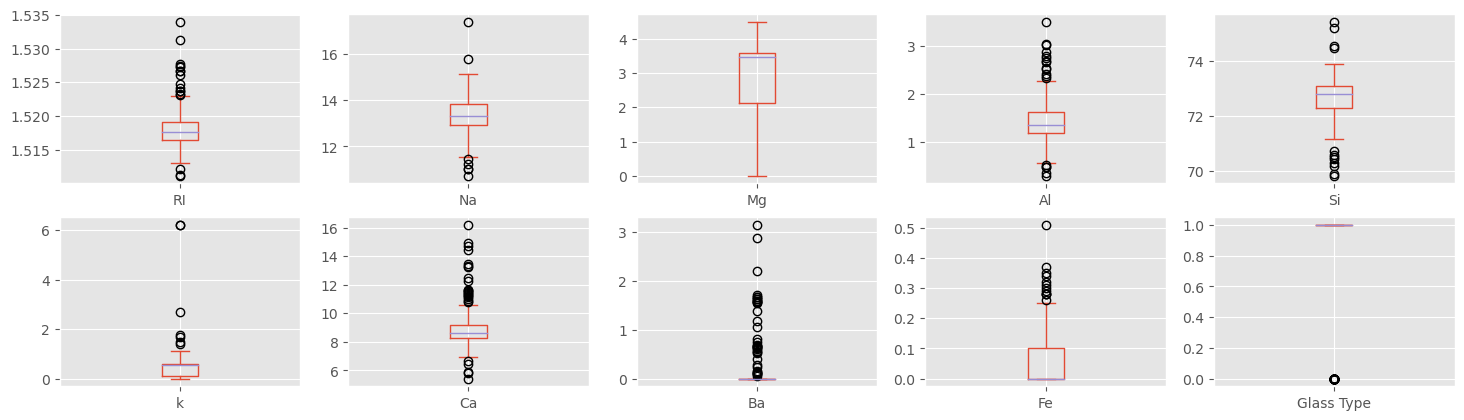

In [173]:
glass_iden_pred.plot(kind='box',subplots=True,layout=(7,5),figsize=(18,18))

Outliers are present in the RI,Calcium,Barium, Magnesium,Iron, Aluminum and Silicon cloumns

## Removing Outliers

In [174]:
from scipy.stats import zscore
z=np.abs(zscore(glass_iden_pred))
threshold=3
np.where(z>3)
glass_iden_pred=glass_iden_pred[(z<3).all(axis=1)]
glass_iden_pred

,RI,Na,Mg,Al,Si,k,Ca,Ba,Fe,Glass Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,0


## Splitting the Data

In [175]:
x=glass_iden_pred.drop(['Glass Type'],axis=1)
x

,RI,Na,Mg,Al,Si,k,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [176]:
y=glass_iden_pred.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
208    0
209    0
210    0
211    0
212    0
Name: Glass Type, Length: 194, dtype: int64

## SMOTE Technique to Balance the data

In [177]:
from imblearn.over_sampling import SMOTE
target = SMOTE()
x,y= target.fit_resample(x,y)

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=53)


In [179]:
x_train.shape

(231, 9)

In [180]:
x_test.shape

(77, 9)

In [181]:
y_train.shape

(231,)

In [182]:
y_test.shape

(77,)

In [183]:
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()
knn=KNeighborsClassifier()
etc=ExtraTreesClassifier()

model=(Lg,dtc,gnb,ada,rfc,gb,knn,etc)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of',m,)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

Accuracy Score of LogisticRegression()
0.961038961038961
[[39  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.95      0.97      0.96        36

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77

Accuracy Score of DecisionTreeClassifier(criterion='entropy')
0.987012987012987
[[41  0]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.97      0.99        36

    accuracy                           0.99        77
   macro avg       0.99      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77

Accuracy Score of GaussianNB()
0.948051948051948
[[38  3]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     

In [184]:
y_pred=gb.predict(x_test)
data1=pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
data1

,Actual,Predicted
48,1,1
90,1,1
279,0,0
152,1,1
95,1,1
...,...,...
307,0,0
66,1,1
241,0,0
263,0,0


In [185]:
y_pred=etc.predict(x_test)
data2=pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
data2

,Actual,Predicted
48,1,1
90,1,1
279,0,0
152,1,1
95,1,1
...,...,...
307,0,0
66,1,1
241,0,0
263,0,0


## The model "AdaBoostClassifier,GradientBoostingClassifier,KNeighborsClassifier and ExtraTreesClassifier" works best with accuracy score of 0.967741935483871 when compared to other models.
From the testing data of 93 ,the below are the types of glass 
Window glass -36 
Non Window Glass-41

### AUC ROC Curve

In [186]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

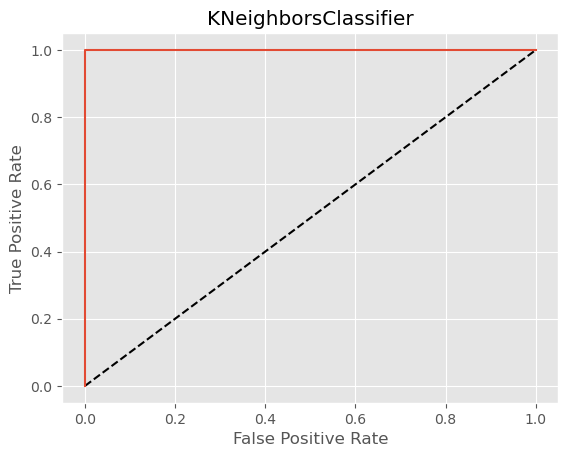

In [187]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="KNeighborsClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighborsClassifier')
plt.show()

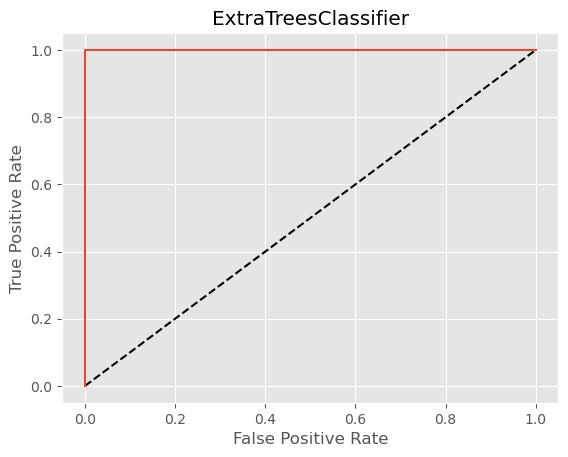

In [188]:
y_pred_prob=etc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="ExtraTreesClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ExtraTreesClassifier')
plt.show()

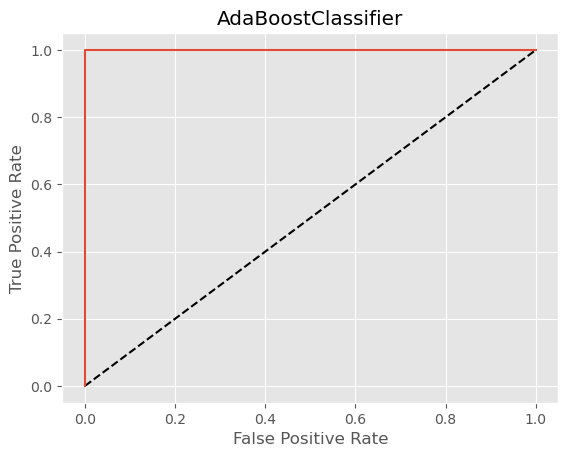

In [189]:
y_pred_prob=ada.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="AdaBoostClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier')
plt.show()

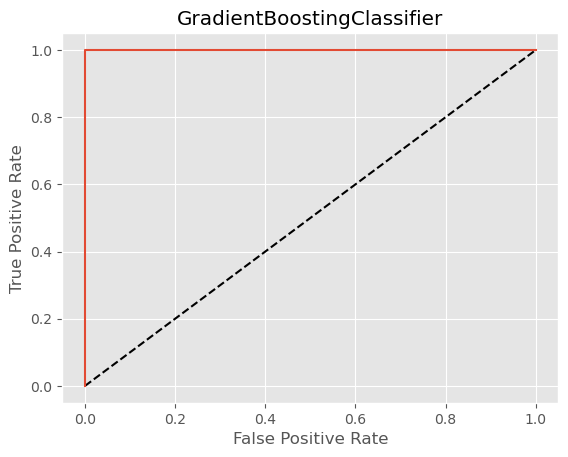

In [191]:
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="GradientBoostingClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoostingClassifier')
plt.show()